In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

loading the data set

In [2]:
df = pd.read_csv("/Users/loaner/Desktop/ram/python/Project/salaries (1).csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Machine Learning Engineer,130000,USD,130000,US,0,US,M
1,2022,MI,FT,Machine Learning Engineer,90000,USD,90000,US,0,US,M
2,2022,MI,FT,Data Scientist,120000,USD,120000,US,100,US,M
3,2022,MI,FT,Data Scientist,100000,USD,100000,US,100,US,M
4,2022,MI,FT,Data Scientist,85000,USD,85000,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
1327,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
1328,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
1329,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
1330,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


Data preprocessing steps below


In [3]:
#looking for null values in the data set
df.isnull()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1327,False,False,False,False,False,False,False,False,False,False,False
1328,False,False,False,False,False,False,False,False,False,False,False
1329,False,False,False,False,False,False,False,False,False,False,False
1330,False,False,False,False,False,False,False,False,False,False,False


In [4]:
# to find any columns in the data set to see if they have null values in them

df.isnull().sum()


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Found that there are no null values in the dataset, then proceding for further data processing 

In [5]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:

df=df.drop(['salary','salary_currency'],axis=1)
#removed columns that are not needed 

In [7]:
df['company_size'].replace(['S','M','L'],[1,2,3],inplace=True)

#S: less than 50 employees (small)-1
#M: 50 to 250 employees (medium)-2
#L: more than 250 employees (large)-3

In [8]:
df['experience_level'].replace(['EX','SE','MI','EN'],[4,3,2,1],inplace=True)
#Executive level-1
#Senior Level-2
#Mid Level-3
#Entery level as 4

In [9]:
df['employment_type'].replace(['FT','CT','PT','FL'],[1,2,3,4],inplace=True)
#full time -FT -1
#contract -CT-2 
#parttime-PT-3
#free lancing- FL-4

In [10]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,2,1,Machine Learning Engineer,130000,US,0,US,2
1,2022,2,1,Machine Learning Engineer,90000,US,0,US,2
2,2022,2,1,Data Scientist,120000,US,100,US,2
3,2022,2,1,Data Scientist,100000,US,100,US,2
4,2022,2,1,Data Scientist,85000,US,100,US,2
...,...,...,...,...,...,...,...,...,...
1327,2020,3,1,Data Scientist,412000,US,100,US,3
1328,2021,2,1,Principal Data Scientist,151000,US,100,US,3
1329,2020,1,1,Data Scientist,105000,US,100,US,1
1330,2020,1,2,Business Data Analyst,100000,US,100,US,3


In [11]:
df.groupby('job_title').size()

job_title
3D Computer Vision Researcher          3
AI Scientist                          12
Analytics Engineer                    43
Applied Data Scientist                 6
Applied Machine Learning Scientist     9
                                      ..
Product Data Analyst                   3
Product Data Scientist                 1
Research Engineer                      1
Research Scientist                    20
Staff Data Scientist                   1
Length: 64, dtype: int64

In [12]:
# as from above we can see that we have 64 different job titltes among them most of them are similar to each other 
#so gouping of similar jobs is done below 
df1=df.replace(
    dict.fromkeys(['Applied Data Scientist',
'Data Science Consultant',
'Data Science Engineer',
'Data Science Lead',
'Data Science Manager',
'Data Scientist',
'Data Scientist Lead',
'Head of Data',
'Head of Data Science',
'Lead Data Scientist',
'Principal Data Scientist',
'Product Data Scientist',
'Staff Data Scientist','Director of Data Science'], 'Data Scientist')
)
df2=df1.replace(
    dict.fromkeys(['Business Data Analyst',
'Data Analyst',
'Finance Data Analyst',
'Financial Data Analyst',
'Lead Data Analyst',
'Marketing Data Analyst',
'Principal Data Analyst',
'Product Data Analyst'], 'Data Analyst')
)
df3=df2.replace(dict.fromkeys(['Big Data Architect',
'Big Data Engineer'], 'Big Data Engineer'))
df4=df3.replace(dict.fromkeys(['Applied Machine Learning Scientist',
'Head of Machine Learning',
'Lead Machine Learning Engineer',
'Machine Learning Developer',
'Machine Learning Engineer',
'Machine Learning Infrastructure Engineer',
'Machine Learning Manager',
'Machine Learning Research Engineer',
'Machine Learning Scientist',
'ML Engineer'], 'ML Engineer'))
df5=df4.replace(dict.fromkeys(['Cloud Data Engineer',
'Data Engineer',
'Data Engineering Manager',
'Director of Data Engineering',
'Lead Data Engineer','Data Manager',
'Principal Data Engineer'], 'Data Engineer'))
df6=df5.replace(dict.fromkeys(['Analytics Engineer',
'Data Analytics Consultant',
'Data Analytics Engineer',
'Data Analytics Lead',
'Data Analytics Manager',
'Data Operations Analyst',
'Data Operations Engineer',
'Data Specialist'
],'Data Analytics Engineer'))
df7=df6.replace(dict.fromkeys(['Cloud Data Architect',
'Data Architect',
'Principal Data Architect'], 'Data Architect'))
df8=df7.replace(dict.fromkeys(['BI Analyst',
'BI Data Analyst',
'Power BI Developer'], 'BI Analyst'))
df9=df8.replace(dict.fromkeys(['Computer Vision Engineer',
'Computer Vision Software Engineer',
'ETL Developer',
'NLP Engineer'], 'Computer Vision Engineer'))

df10=df9.replace(dict.fromkeys(['AI Scientist','Applied Scientist'], 'AI Scientist'))

df11=df10.replace(dict.fromkeys(['Research Engineer','3D Computer Vision Researcher',
'Research Scientist'
],'Research Sceintist'))

df=df11

In [13]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,2,1,ML Engineer,130000,US,0,US,2
1,2022,2,1,ML Engineer,90000,US,0,US,2
2,2022,2,1,Data Scientist,120000,US,100,US,2
3,2022,2,1,Data Scientist,100000,US,100,US,2
4,2022,2,1,Data Scientist,85000,US,100,US,2
...,...,...,...,...,...,...,...,...,...
1327,2020,3,1,Data Scientist,412000,US,100,US,3
1328,2021,2,1,Data Scientist,151000,US,100,US,3
1329,2020,1,1,Data Scientist,105000,US,100,US,1
1330,2020,1,2,Data Analyst,100000,US,100,US,3


<AxesSubplot:xlabel='job_title'>

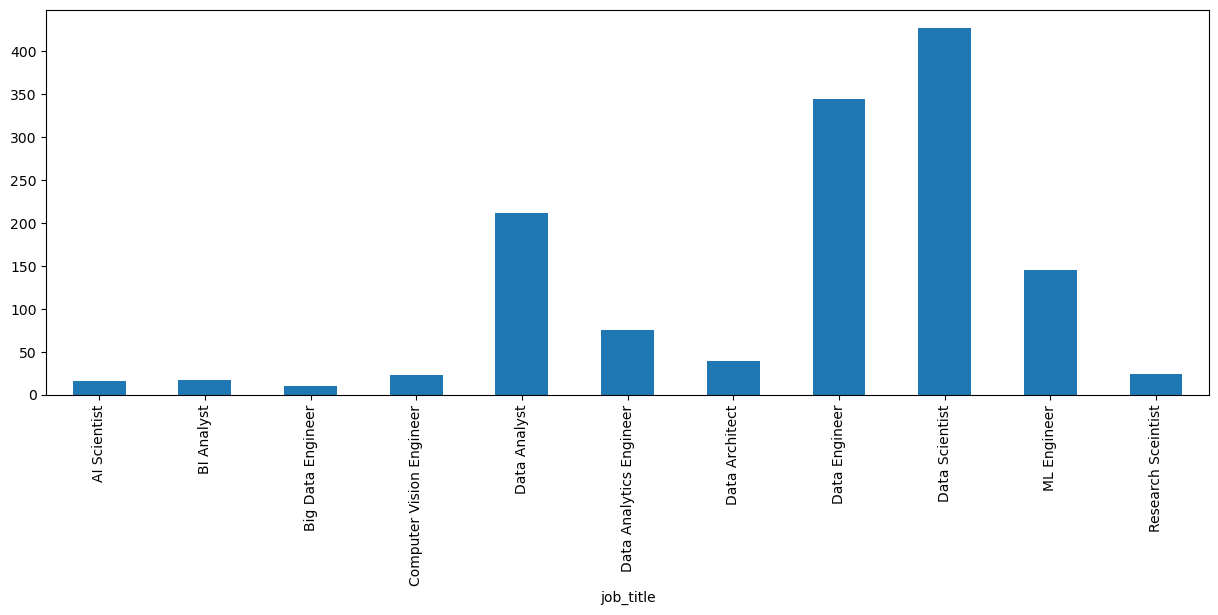

In [14]:
#ploting job title on graph over the two years of time frame
df.groupby('job_title').size().plot(kind='bar',figsize=(15,5))

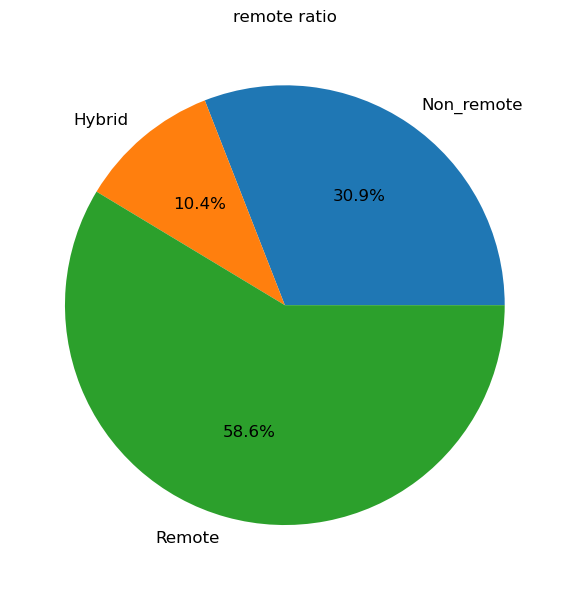

In [15]:
#ploting job type ratio
fig, ax = plt.subplots(figsize=(6, 6))
x =df.groupby('remote_ratio').size()
labels=['Non_remote','Hybrid','Remote']
ax.pie(x, labels=labels, autopct='%.1f%%',
       wedgeprops={'linewidth': 0, 'edgecolor': 'white'},
       textprops={'size': 'large'})
ax.set_title('remote ratio', fontsize=12)
plt.tight_layout()

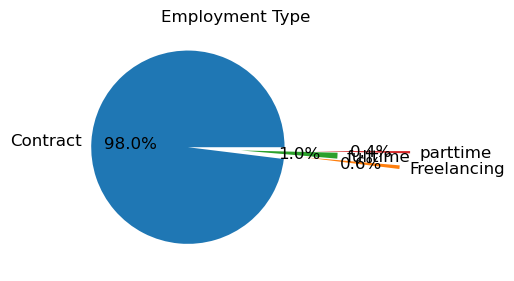

In [16]:
#plotting employement type
fig, ax = plt.subplots(figsize=(6, 6))

x =df.groupby('employment_type').size()
labels=['Contract','Freelancing','fulltime','parttime']
ax.pie(x, labels=labels, autopct='%.1f%%',explode=[0.5,0.7,0.05,0.8],
       wedgeprops={'linewidth': 0, 'edgecolor': 'white'},
       textprops={'size': 'large'})
ax.set_title('Employment Type', fontsize=12)
plt.tight_layout()

Text(0, 0.5, 'Salary_in_usd')

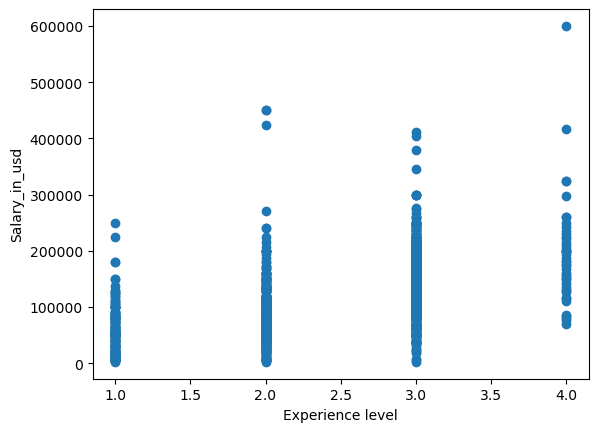

In [17]:

y1 = df[['salary_in_usd']]
x1 = df[['experience_level']]
#Visualize the Data
from matplotlib import pyplot as plt
y1 = df[['salary_in_usd']]
x1 = df[['experience_level']]
plt.scatter(x1,y1)

plt.xlabel('Experience level')
plt.ylabel('Salary_in_usd')

#so far we had data preprocessing done and from below we are going to train the machine learning models and predict
their out comes


In [18]:
# spliting data into test and train data sets

X = df[['work_year', 'company_size','experience_level','employment_type','remote_ratio','salary_in_usd']]
#Y= df['job_title']
#X = df[['work_year','salary_in_usd']]
Y= df['job_title']

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=2)

In [19]:
#logisitic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train,Y_train)
Y_test_predict = clf.predict(X_test)
accuracy_score(Y_test, Y_test_predict)

0.2958801498127341

In [20]:
confusion_matrix(Y_test,Y_test_predict)

array([[ 0,  0,  0,  1,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  1,  2,  0,  0],
       [ 0,  0,  1,  5,  0,  0,  1, 31,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  1,  7,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  5,  0,  0,  2, 70,  0,  0],
       [ 0,  0,  0,  9,  0,  0,  3, 72,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0, 25,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  4,  0,  0]])

In [21]:
#predicitng job trends using all same variable except salaries
X_pred1 = [[2023, 3, 1, 1, 100, 200000], [2023, 3, 1, 1,100, 100000], [2023, 1, 3, 1,100, 80000]]
X_pred_std1 = scaler.transform(X_pred1)
Y_pred1 = clf.predict(X_pred_std1)
Y_pred1

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['Data Scientist', 'Data Scientist', 'Data Analyst'], dtype=object)

#The accuracy of this method is around 29.588% and we cant relay much more on the job prediction as accuracy is low

In [22]:
Xk = df[['work_year', 'company_size','experience_level','employment_type','remote_ratio','salary_in_usd']]
#Y= df['job_title']
#X = df[['work_year','salary_in_usd']]
Yk= df['job_title']

In [23]:
scaler = StandardScaler()
Xk_scaled = scaler.fit_transform(Xk)
Xk_train, Xk_test, Yk_train, Yk_test = train_test_split(Xk_scaled, Yk, test_size=0.2, random_state=2)

Text(0, 0.5, 'Accuracy')

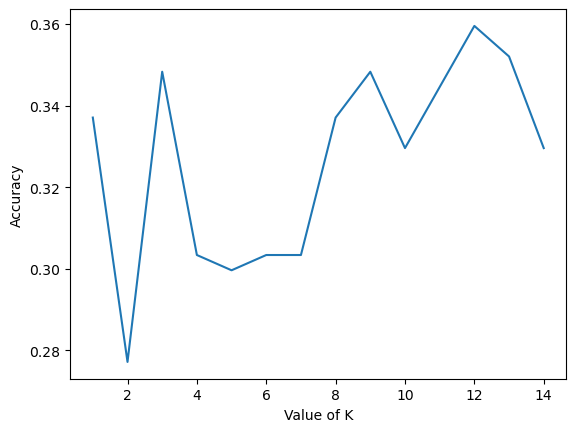

In [24]:
#k nearest neighbour classifier
#knn
#calculated k value over in the range of 1 to 15 to find out, which value has higher accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Range_k = range(1,15)
scores = {}
scores_list = []
for k in Range_k:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(Xk_train, Yk_train)
    Yk_pred = classifier.predict(Xk_test)
    scores[k] = metrics.accuracy_score(Yk_test,Yk_pred)
    scores_list.append(metrics.accuracy_score(Yk_test,Yk_pred))
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

#found that highest accuracy was given at k=12 means considering 12 neighbours


In [25]:
classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(X_train, Y_train)
Y_pred1 = classifier.predict(X_test)
result1 = metrics.confusion_matrix(Y_test, Y_pred1)
print("Confusion Matrix:",result1)
result = metrics.classification_report(Y_test, Y_pred1)
print("Classification Report:",result)

Confusion Matrix: [[ 0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  1  0  0  1  5  0  0]
 [ 0  0  0  1  0  0  1  5  0  0]
 [ 0  0  0 16  2  0  8 12  0  0]
 [ 0  0  0  2  0  0  5  3  0  0]
 [ 0  0  0  0  0  0  3  7  0  0]
 [ 0  0  0 14  1  0 30 29  3  0]
 [ 0  0  0 17  0  0 14 50  3  0]
 [ 0  0  0  1  1  0  9 16  0  0]
 [ 0  0  0  0  0  0  1  3  0  0]]
Classification Report:                           precision    recall  f1-score   support

            AI Scientist       0.00      0.00      0.00         3
              BI Analyst       0.00      0.00      0.00         7
Computer Vision Engineer       0.00      0.00      0.00         7
            Data Analyst       0.31      0.42      0.36        38
 Data Analytics Engineer       0.00      0.00      0.00        10
          Data Architect       0.00      0.00      0.00        10
           Data Engineer       0.42      0.39      0.40        77
          Data Scientist       0.38      0.60      0.46        84
             ML Engineer       0.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
#keeping all variables constant just changed salaries to find the output of the model
X_out=[[2023, 3, 1, 1, 100, 200000], [2023, 3, 1, 1,100, 100000], [2023, 1, 3, 1,100, 80000]]
#X_out=[[2034,2000],[2023,100000],[2023,80000]]
X_outs=scaler.transform(X_out)

Y_out=classifier.predict(X_outs)
print(Y_out)

['ML Engineer' 'Data Scientist' 'Data Scientist']


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


The accuracy for KNN model with 12 neighbours is 36% and job predicitons are varied compared to logistic regression

Decision tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [28]:
## Select features
Xd = df[['work_year', 'company_size', 'experience_level','employment_type', 'remote_ratio', 'salary_in_usd']]

# Standardize features
scalerd = StandardScaler()
Xd_std1 = scalerd.fit_transform(Xd)

# Select target
Yd = df['job_title']

# Create decision tree model
dt1 = DecisionTreeClassifier()

# Train model
dt1.fit(Xd_std1, Yd)

# Make predictions
Xd_pred1 = [[2023, 3, 1, 1, 100, 200000], [2023, 3,1, 1, 100, 100000], [2023, 1,3, 1, 100, 80000]]
Xd_pred_std1 = scalerd.transform(Xd_pred1)
Yd_pred1 = dt1.predict(Xd_pred_std1)

# Print predictions
print(Yd_pred1)

# Calculate precision, recall, and accuracy
accuracy = accuracy_score(Yd, dt1.predict(Xd_std1))
print("accuracy is",accuracy*100,"%")

['AI Scientist' 'Data Analyst' 'ML Engineer']
accuracy is 86.86186186186187 %


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


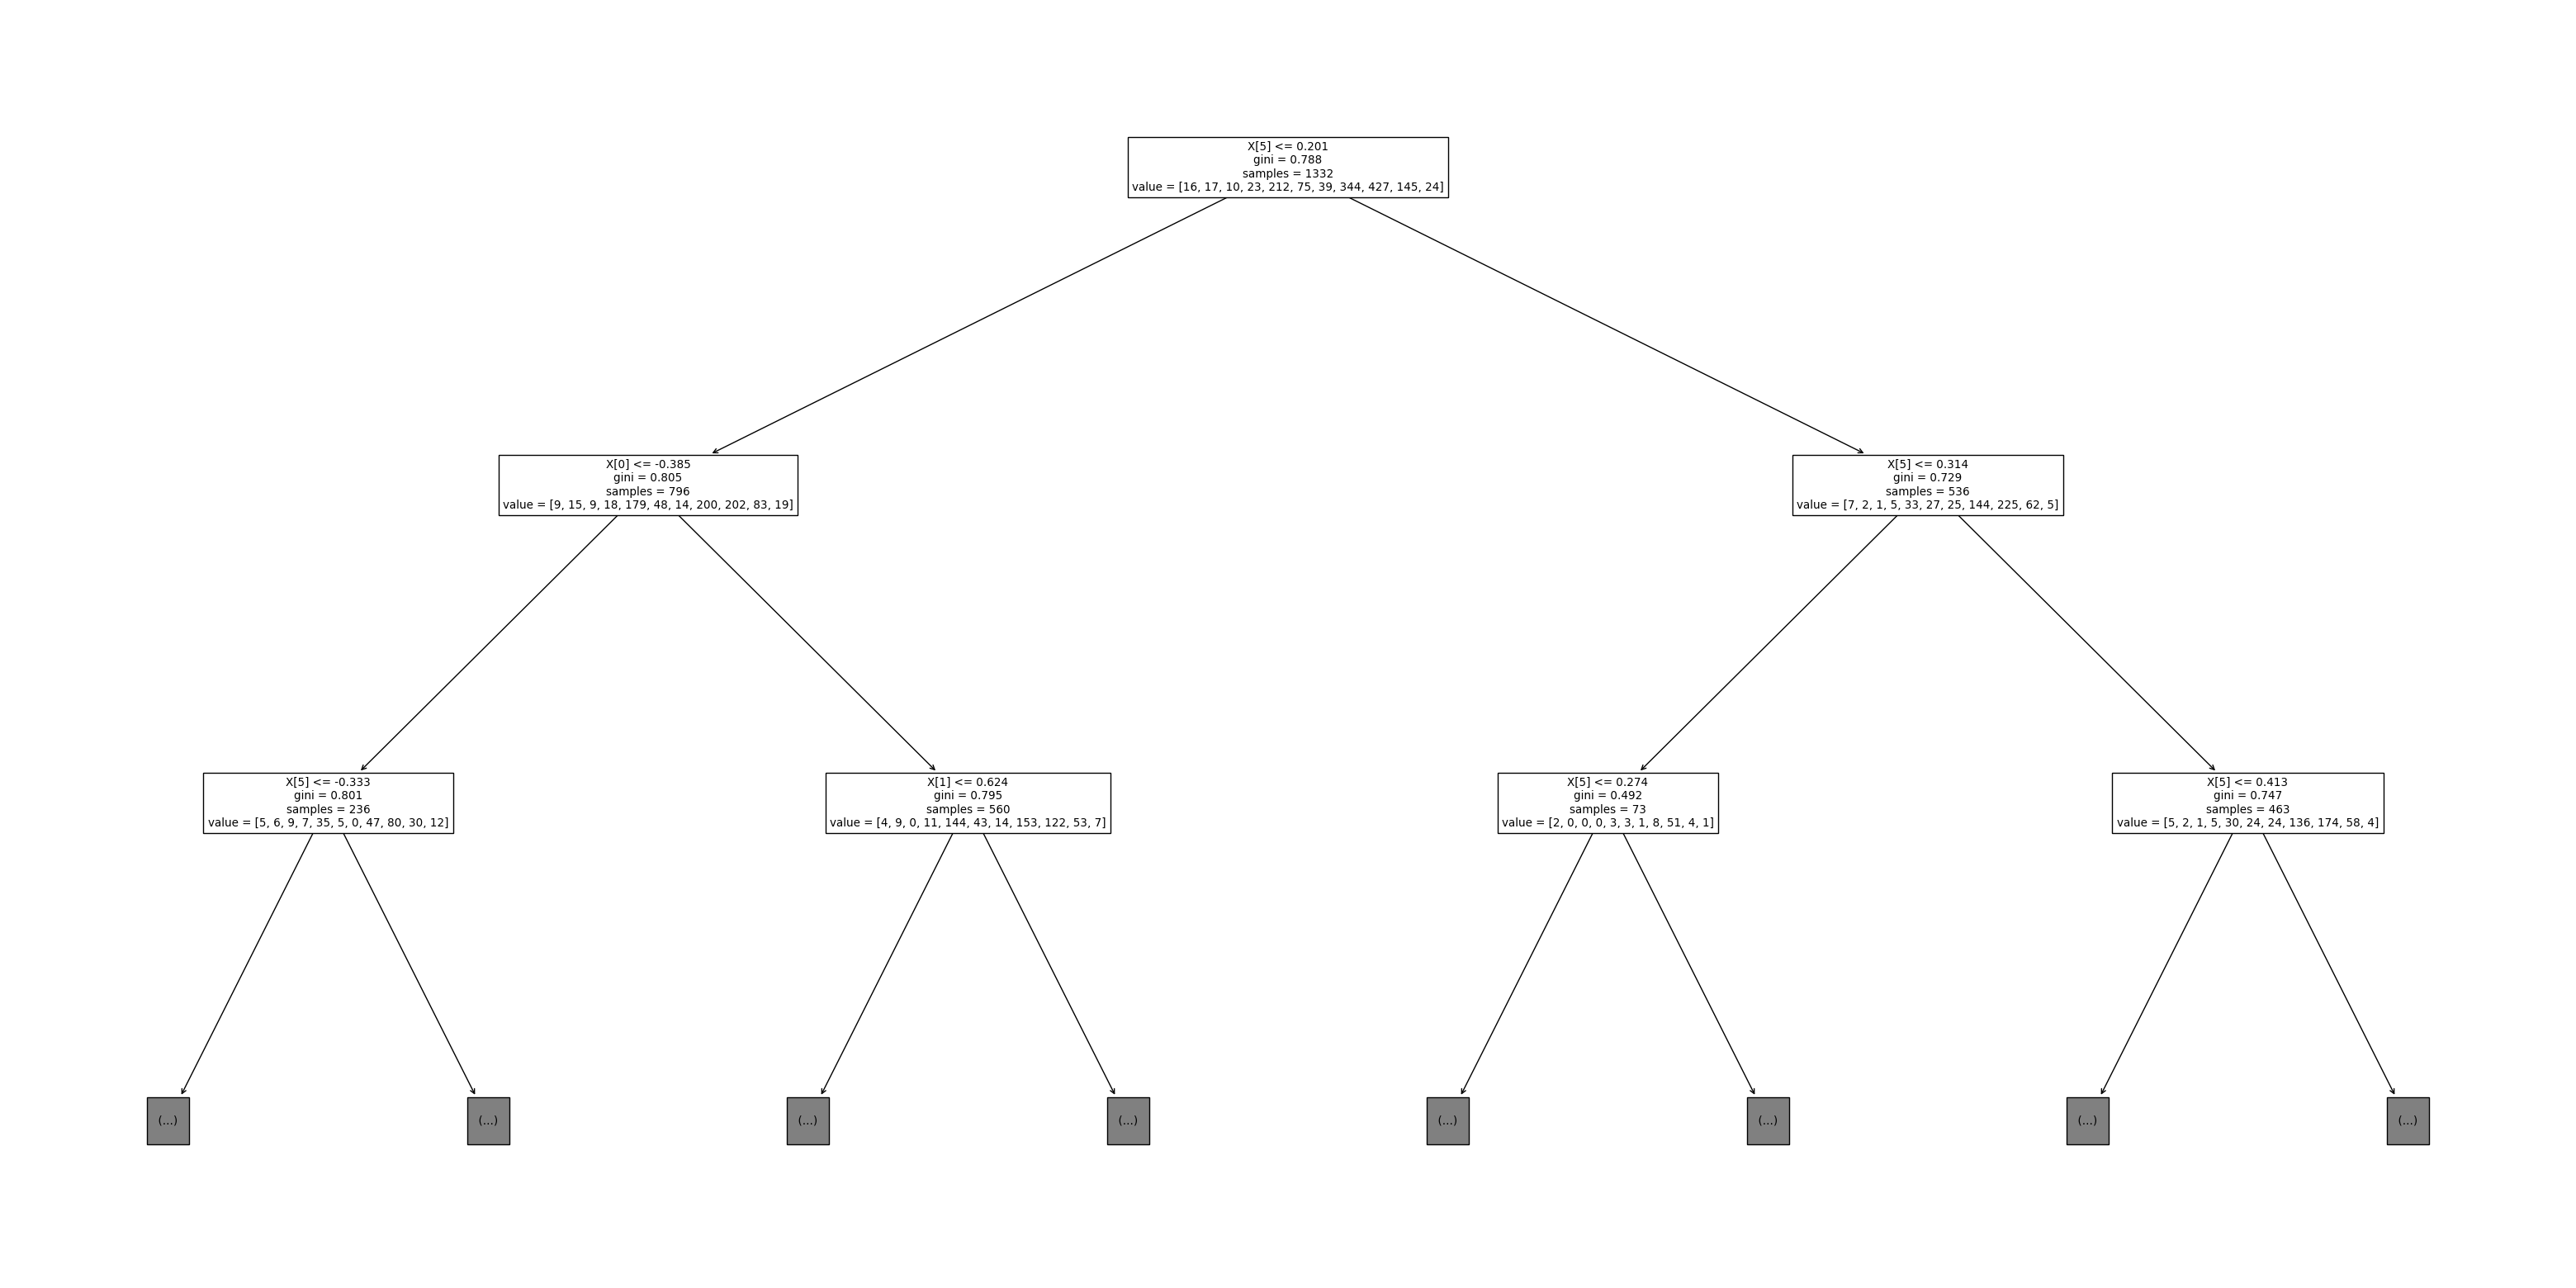

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
tree.plot_tree(dt1, max_depth=2
              )
plt.show()

In [31]:
training_data = df.sample(frac=0.8, random_state=100)
testing_data = df[~df.index.isin(training_data.index)]
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 1066
No. of testing examples: 266


THe accuracy of the decision tree is 86.86% and it predicts 'AI Scientist' 'ML Engineer' 'ML Engineer'
jobs depending on our inputs